In [98]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load all results

In [99]:
LSTM_full_results = []
for i in range(5):
    with open(f"results/LSTM/Performance_metrices_LSTM_bin_{i+1}.pkl", "rb") as f:
        data = pickle.load(f)
        LSTM_full_results.append(data)

CNN_full_results = []
for i in range(5):
    with open(f"results/CNN/Performance_metrices_CNN_bin_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        CNN_full_results.append(data)

XGBoost_full_results = []
for i in range(5):
    with open(f"results/XGBoost/Performance_metrices_XGBoost_bin_{i}.pkl", "rb") as f:
        data = pickle.load(f)
        XGBoost_full_results.append(data)

In [100]:
LSTM_mape = []
for i in range(5):
  LSTM_mape_bin =[]
  for j in range(15):
    LSTM_mape_bin.append(LSTM_full_results[i][j]['test_mape'])
  LSTM_mape.append(LSTM_mape_bin)

CNN_mape = []
for i in range(5):
  CNN_mape_bin =[]
  for j in range(15):
    CNN_mape_bin.append(CNN_full_results[i][j]['test_mape'])
  CNN_mape.append(CNN_mape_bin)

XGBoost_mape = []
for i in range(5):
  XGBoost_mape_bin =[]
  for j in range(15):
    XGBoost_mape_bin.append(XGBoost_full_results[i][j]['test_mape'])
  XGBoost_mape.append(XGBoost_mape_bin)

In [101]:
# print results averaged over bins

error = 'mape'
sum = 0
count = 0
for i in range(5):
    sum = 0
    count = 0
    for j in range(15):
        sum += LSTM_full_results[i][j][f'test_{error}']
        count += 1
    print(f"mean {error} of bin {i+1} for LSTM {(sum/count)}")
print()
for i in range(5):
    sum = 0
    count = 0
    for j in range(15):
        sum += CNN_full_results[i][j][f'test_{error}']
        count += 1
    print(f"mean {error} of bin {i+1} for CNN {(sum/count)}")
print()
for i in range(5):
    sum = 0
    count = 0
    for j in range(15):
        sum += XGBoost_full_results[i][j][f'test_{error}']
        count += 1
    print(f"mean {error} of bin {i+1} for XGBoost {(sum/count)}")

mean mape of bin 1 for LSTM 2.4217189103364944
mean mape of bin 2 for LSTM 5.971389499803384
mean mape of bin 3 for LSTM 12.715738217035929
mean mape of bin 4 for LSTM 29.71723015109698
mean mape of bin 5 for LSTM 29.30461809039116

mean mape of bin 1 for CNN 10.319369124869505
mean mape of bin 2 for CNN 13.977624972661337
mean mape of bin 3 for CNN 18.21062569816907
mean mape of bin 4 for CNN 77.12330967187881
mean mape of bin 5 for CNN 88.98917188247044

mean mape of bin 1 for XGBoost 1.7753058140916071
mean mape of bin 2 for XGBoost 6.401520393219707
mean mape of bin 3 for XGBoost 7.143437483655859
mean mape of bin 4 for XGBoost 33.24595180886777
mean mape of bin 5 for XGBoost 15.5175564302214


In [102]:
# print results for every single stock

error = 'mape'
for i in range(5):
    for j in range(15):
        print(f"{error} of stock {j+1} in bin {i+1} for LSTM {LSTM_full_results[i][j][f'test_{error}']}")
    print()
for i in range(5):
    for j in range(15):
        print(f"{error} of stock {j+1} in bin {i+1} for CNN {CNN_full_results[i][j][f'test_{error}']}")
    print()
for i in range(5):
    for j in range(15):
        print(f"{error} of stock {j+1} in bin {i+1} for XGBoost {XGBoost_full_results[i][j][f'test_{error}']}")
    print()

mape of stock 1 in bin 1 for LSTM 3.1021760776638985
mape of stock 2 in bin 1 for LSTM 2.0892592146992683
mape of stock 3 in bin 1 for LSTM 2.9656538739800453
mape of stock 4 in bin 1 for LSTM 7.916201651096344
mape of stock 5 in bin 1 for LSTM 1.4294159598648548
mape of stock 6 in bin 1 for LSTM 1.17527199909091
mape of stock 7 in bin 1 for LSTM 1.1830720119178295
mape of stock 8 in bin 1 for LSTM 1.3378733769059181
mape of stock 9 in bin 1 for LSTM 1.433253102004528
mape of stock 10 in bin 1 for LSTM 1.2300672940909863
mape of stock 11 in bin 1 for LSTM 1.723400503396988
mape of stock 12 in bin 1 for LSTM 1.2862578965723515
mape of stock 13 in bin 1 for LSTM 1.7784161493182182
mape of stock 14 in bin 1 for LSTM 1.014281902462244
mape of stock 15 in bin 1 for LSTM 6.661182641983032

mape of stock 1 in bin 2 for LSTM 4.762320965528488
mape of stock 2 in bin 2 for LSTM 7.02999010682106
mape of stock 3 in bin 2 for LSTM 4.264531657099724
mape of stock 4 in bin 2 for LSTM 6.93683996796608

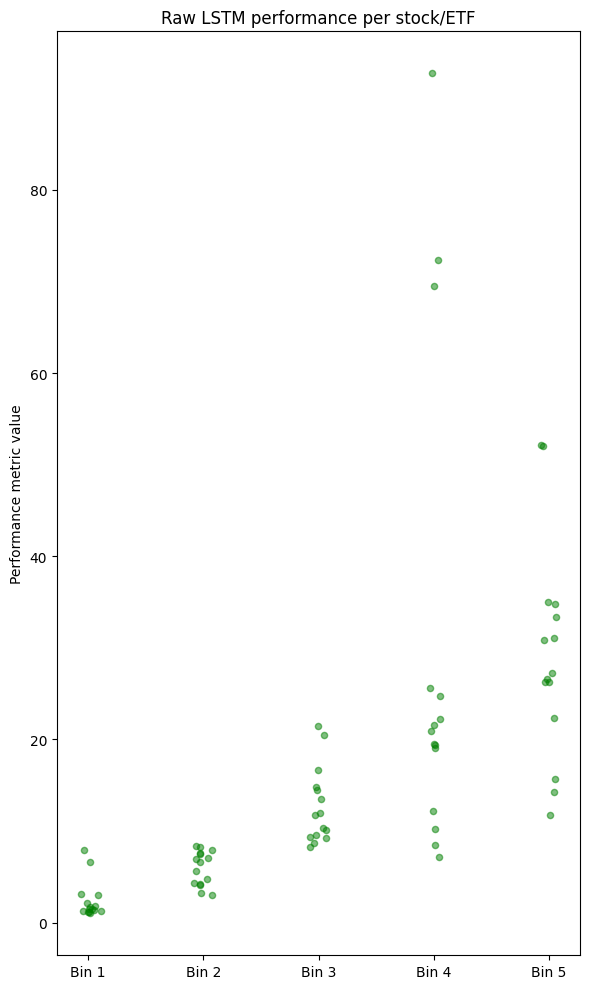

In [103]:
# plot LSTM performance per asset

fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(LSTM_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='green', s=20)

ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Raw LSTM performance per stock/ETF')

plt.tight_layout()
plt.show()

In [104]:
# import to get ticker symbols of LSTM outliers discussed in the results section in the thesis
with open('preprocessed_data/preprocessed_LSTM_CNN.pkl', 'rb') as f:
    LSTM_CNN_preprocessed_data = pickle.load(f)

outliers_LSTM = [] 
outliers_LSTM.append(LSTM_CNN_preprocessed_data[3][4][2])
outliers_LSTM.append(LSTM_CNN_preprocessed_data[3][7][2])
outliers_LSTM.append(LSTM_CNN_preprocessed_data[3][14][2])
outliers_LSTM.append(LSTM_CNN_preprocessed_data[4][8][2])
outliers_LSTM.append(LSTM_CNN_preprocessed_data[4][11][2])
print(outliers_LSTM)

['TTGT', 'SRI', 'MATV', 'ANGI', 'RRGB']


In [105]:
stock_data = pd.read_csv('stock_data.csv', index_col=0, parse_dates=True)

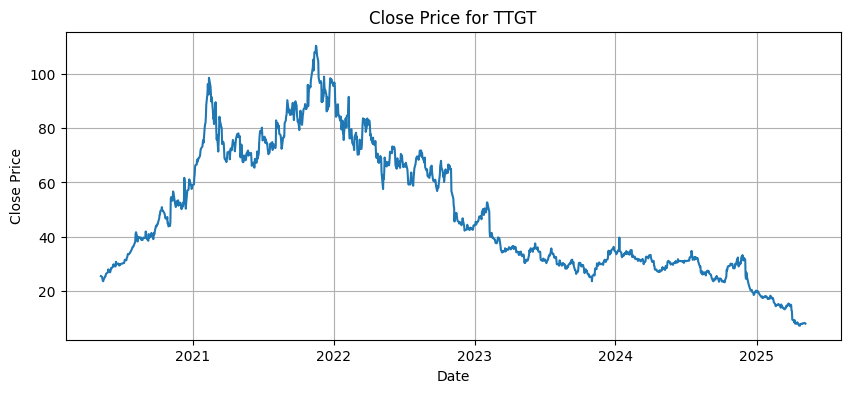

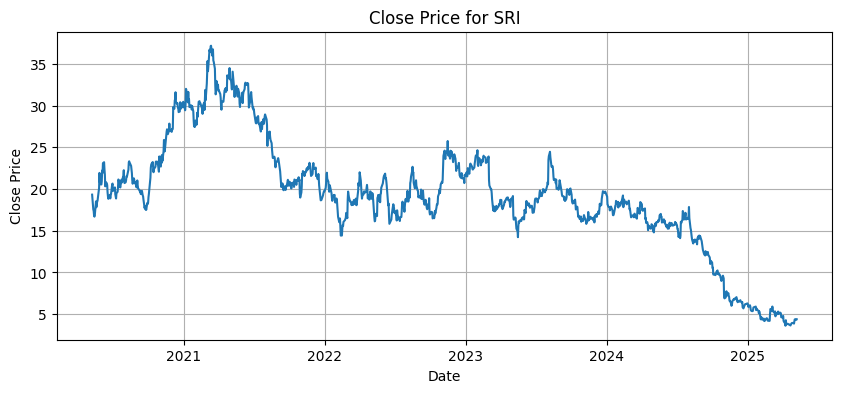

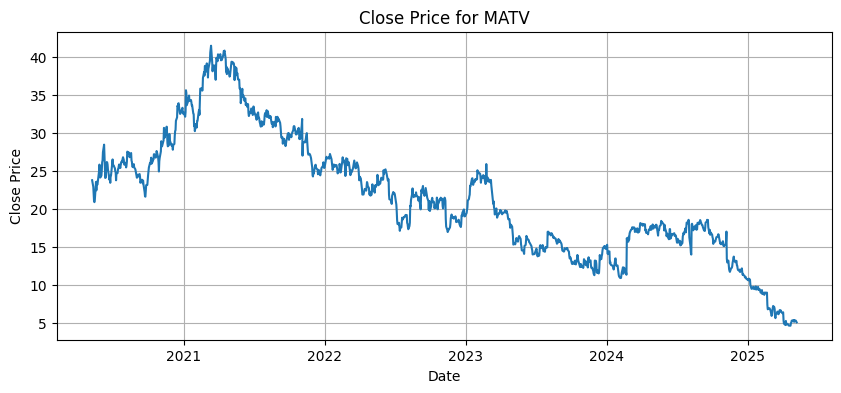

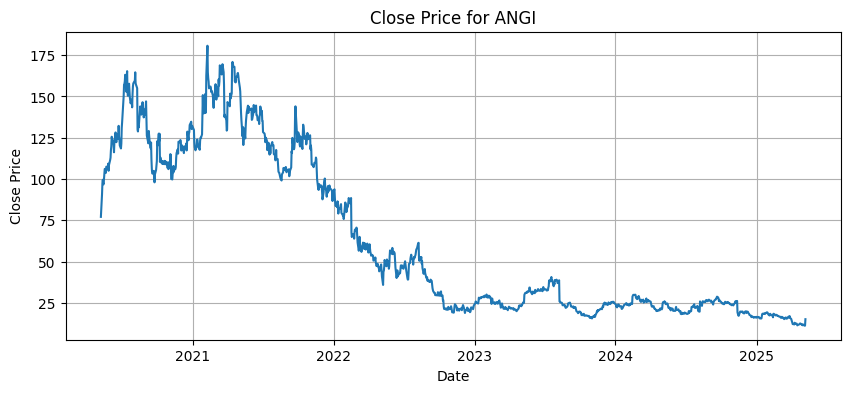

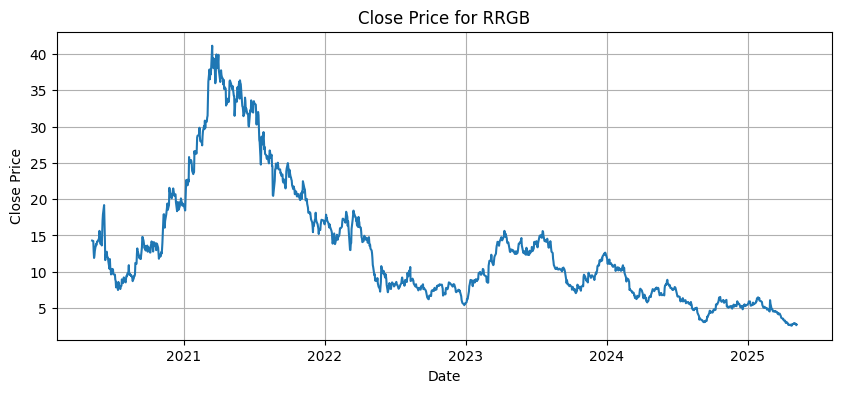

In [106]:
# plot the outliers

for symbol in outliers_LSTM:
    # Filter for rows matching the symbol
    df_symbol = stock_data[symbol]
    
    # Sort by index
    df_symbol = df_symbol.sort_index()
    
    # Plot
    plt.figure(figsize=(10, 4))
    plt.plot(df_symbol)
    plt.title(f"Close Price for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.show()


Load the volatility_df to see what volatility the two stocks have to give the mape a concrete meaning in terms of effectiveness.

In [107]:
# import volatility_df

with open(f'volatility_df.pkl', 'rb') as f:
    volatility_df = pickle.load(f)

In [108]:
LSTM_CNN_preprocessed_data[0][0][2]

'MARB'

In [109]:
error_LSTM = [] 
error_LSTM.append(LSTM_CNN_preprocessed_data[0][0][2])
error_LSTM.append(LSTM_CNN_preprocessed_data[0][2][2])

volatility_df[error_LSTM]

symbol,MARB,BSMS
sample_standard_deviation_of_logarithmic_returns,0.002452,0.002423
volatility_of_volatility,0.000468,0.000671


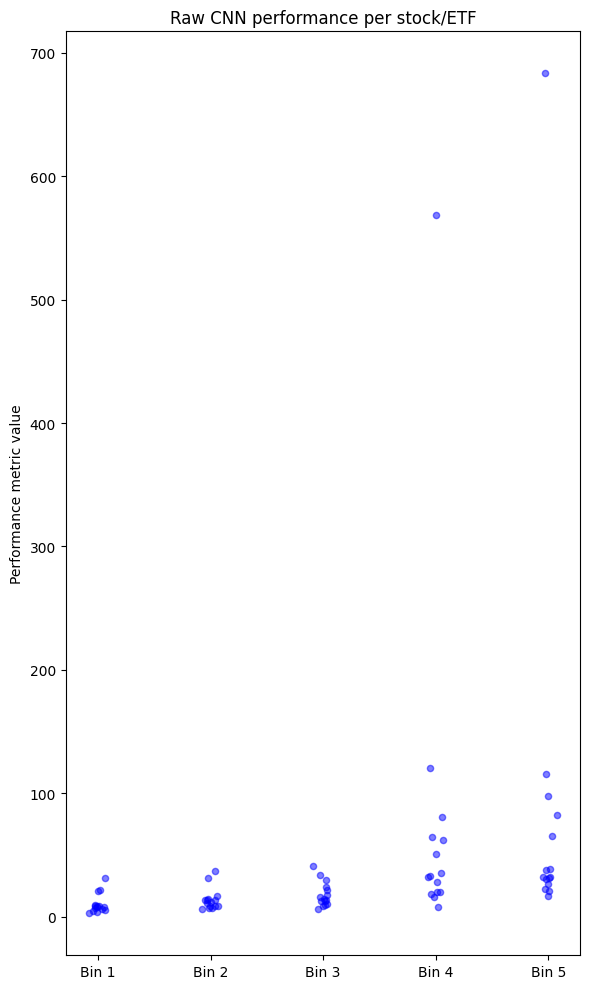

In [110]:
# plot CNN performance per asset

fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(CNN_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='blue', s=20)

ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Raw CNN performance per stock/ETF')

plt.tight_layout()
plt.show()

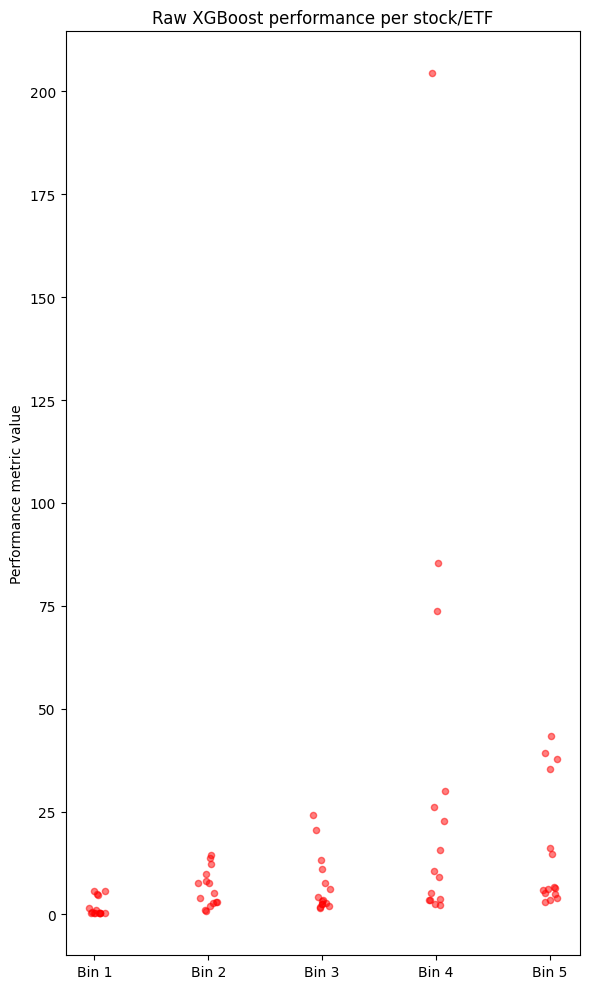

In [111]:
# plot XGBoost performance per asset

fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(XGBoost_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='red', s=20)

ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Raw XGBoost performance per stock/ETF')

plt.tight_layout()
plt.show()

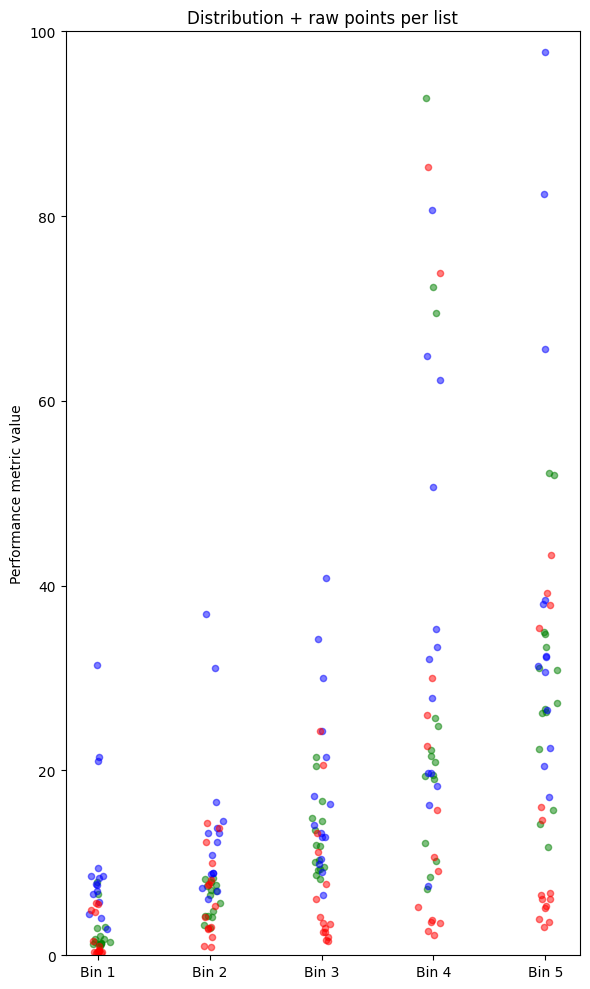

In [112]:
# plot combined performance of all three models

fig, ax = plt.subplots(figsize=(6,10))


# scatter the raw points on top (with jitter)
for idx, group in enumerate(LSTM_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='green', s=20, label='LSTM_performance')

# scatter the raw points on top (with jitter)
for idx, group in enumerate(CNN_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='blue', s=20, label='CNN_performance')

# scatter the raw points on top (with jitter)
for idx, group in enumerate(XGBoost_mape, start=1):
    x = np.random.normal(loc=idx, scale=0.04, size=len(group))
    ax.scatter(x, group, alpha=0.5, color='red', s=20, label='XGBoost_performance')

ax.set_ylim(0,100)
ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Bin {i}' for i in range(1,6)])
ax.set_xlabel('')
ax.set_ylabel('Performance metric value')
ax.set_title('Distribution + raw points per list')

plt.tight_layout()
plt.show()


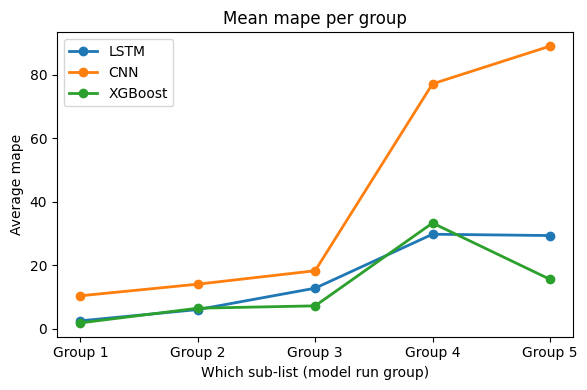

In [113]:
# compute the mean of each group
means_LSTM = [np.mean(group) for group in LSTM_mape]
means_CNN = [np.mean(group) for group in CNN_mape]
means_XGBoost = [np.mean(group) for group in XGBoost_mape]

# plot
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(range(1, 6), means_LSTM, marker='o', linestyle='-', linewidth=2, label='LSTM')
ax.plot(range(1, 6), means_CNN, marker='o', linestyle='-', linewidth=2, label='CNN')
ax.plot(range(1, 6), means_XGBoost, marker='o', linestyle='-', linewidth=2, label='XGBoost')

# adjust the plot
ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Group {i}' for i in range(1, 6)])
ax.set_xlabel('Which sub-list (model run group)')
ax.set_ylabel(f'Average mape')
ax.set_title(f'Mean mape per group')
ax.legend()

plt.tight_layout()
plt.show()


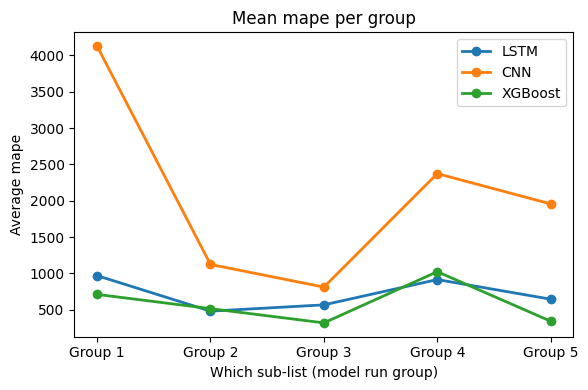

In [114]:
# 1. Compute the mean of each group
means_LSTM = [np.mean(group) for group in LSTM_mape]
means_CNN = [np.mean(group) for group in CNN_mape]
means_XGBoost = [np.mean(group) for group in XGBoost_mape]

# list with volatilities of each bin
volatilities = [0.0025, 0.01245, 0.02246, 0.0325, 0.0455]

# divide the error by the volatility of each bin
for i in range(5):
    means_LSTM[i] = means_LSTM[i] / volatilities[i]
    means_CNN[i] = means_CNN[i] / volatilities[i]
    means_XGBoost[i] = means_XGBoost[i] / volatilities[i]

# plot
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(range(1, 6), means_LSTM, marker='o', linestyle='-', linewidth=2, label='LSTM')
ax.plot(range(1, 6), means_CNN, marker='o', linestyle='-', linewidth=2, label='CNN')
ax.plot(range(1, 6), means_XGBoost, marker='o', linestyle='-', linewidth=2, label='XGBoost')

# adjust the plot
ax.set_xticks(range(1, 6))
ax.set_xticklabels([f'Group {i}' for i in range(1, 6)])
ax.set_xlabel('Which sub-list (model run group)')
ax.set_ylabel(f'Average mape')
ax.set_title(f'Mean mape per group')
ax.legend()

plt.tight_layout()
plt.show()
